# The search.py module

Introduction
============

Hello!
In this IPython notebook, we'll study different kinds of search techniques used in [ search.py ]( https://github.com/aimacode/aima-python/blob/master/search.py ) and try to get an intuition of what search algorithms are best suited for various problems. We first explore uninformed search algorithms and later get our hands on heuristic search strategies.

The code in this IPython notebook, and the entire `aima-python` repository is intended to work with Python 3 (specifically, Python 3.4). So if you happen to be working on Python 2, you should switch to Python 3. For more help on how to install python3, or if you are having other problems, you can always have a look the `intro` IPython notebook. 

Now that you have all that sorted out, let's get started!

## Uninformed Search Strategies

Uninformed Search strategies are called `blind search`. In such search strategies, the only information we have about any state is generated by checking if a piece of data, or any of its successors, matches our `goal state` or not. THAT'S IT. NOTHING MORE. (Well ....not really. See the `value` method defined in the following section).

First let's formulate the problem we intend to solve. So let's import everything from our module.

In [81]:
from search import *

The search and other modules of the repository make use of several imports from the utils module. We will point the useful ones out if they are required to follow the material below. Don't worry. You don't need to read utils.py in order to understand search algorithms.
    
The `Problem` class is an abstract class on which we define our problems(*duh*).
Again, if you are confused about what `abstract class` means have a look at the `Intro` notebook.
The `Problem` class has six methods.
* `__init__(self, initial, goal)` : This is what is called a `constructor` and is the first method called when you create an instance of class. In this and all of the below methods `self` refers to the object itself--the object whose method is called. `initial` specifies the initial state of our search problem. It represents the start state from where our agent begins his task of exploration to find the goal state(s) which is given in the `goal` parameter.
* `actions(self, state)` : This method returns all the possible actions our agent can make in state `state`.
* `result(self, state, action)` : This returns the resulting state if action `action` is taken in the state `state`. This `Problem` class only deals with deterministic outcomes. So we know for sure what every action in a state would result to.
* `goal_test(self, state)` : Given a graph state, it checks if it is a terminal state. If the state is indeed a goal state, value of `True` is returned. Else, of course, `False` is returned.
* `path_cost(self, c, state1, action, state2)` : Return the cost of the path that arrives at `state2` as a result of taking `action` from `state1`, assuming total cost of `c` to get up to `state1`.
* `value(self, state)` : This acts as a bit of extra information in problems where we try to optimize a value when we cannot do a goal test.

Now the above abstract class acts as a parent class, and there is another named called `GraphProblem` in our module. It creates a graph problem from an instance of the `Graph` class. To create a graph, simply type `graph = Graph(dict(...))`. The dictionary must contain nodes of the graph as keys, so make sure they are `hashable`. If you don't know what that means just use strings or numbers. Each node contains the adjacent nodes as keys and the edge length as its value. Each dictionary then should correspond to another dictionary in the graph.  The `Graph` class creates a directed(edges allow only one way traffic) by default. If you want to make an undirected graph, use `UndirectedGraph` instead, but make sure to mention any edge in only one of its nodes.

If you didn't understand the above paragraph, `Fret not!`. Just think of the below code as a magicical method to create a simple undirected graph. I'll explain what it is about later.

In [2]:
museum_graph = UndirectedGraph(dict(
    Start = dict(Dog = 3, Cat = 9, Mouse = 4),
    Dog = dict(Bear = 7),
    Cat = dict(Monkey = 9, Fish = 8, Penguin = 3),
    Mouse = dict(Penguin = 2),
    Bear = dict(Monkey = 7),
    Monkey = dict(Giraffe = 11, Fish = 6),
    Fish = dict(Giraffe = 8),
    Penguin = dict(Parrot = 4, Elephant = 6),
    Giraffe = dict(Hen = 5),
    Parrot = dict(Hen = 10),
    Elephant = dict(Hen = 9)))

Imagine we are in a museum showcasing statues of various animals. To navigate through the museum there are paths between some statues and the entrance. We define the entrance and the statues as nodes in our graph with the path connecting them as edges. The cost/weight of an edge specifies is its length. So `Start = dict(Dog = 3, Cat = 9, Mouse = 4)` means that there are paths from `Start` to `Dog`, `Cat` and `Mouse` with path costs 3, 9 and 4 respectively. 

Here's an image below to better understand our graph.

<img src="images/search_animal.svg" width="80%">
<!-- Theses lovely animal icons were reproduced courtesy of Creative Tail https://www.creativetail.com/40-free-flat-animal-icons/ -->


### Breadth First Search

In Breadth First Search, the `shallowest` unexpanded node is chosen for expansion. That means that all nodes of a given depth must be expanded before any node of the next depth level. This search strategy accomplishes this by using a `FIFO` meaning 'First In First Out' queue. Anything that gets in the queue first also gets out first just like the checkout queue in a supermarket. To use the algorithm, first we need to define our problem. Say we want to find the statue of `Monkey` and we start from the entrance which is the `Start` state. We'll define our problem using the `GraphProblem` class.

In [3]:
monkey_problem = GraphProblem('Start', 'Monkey', museum_graph)

Now let's find the solution for our problem using the `breadth_first_search` method. Note that it returns a `Node` from which we can find the solution by looking at the path that was taken to reach there.

In [4]:
bfs_node = breadth_first_search(monkey_problem)
bfs_node.solution()

['Cat', 'Monkey']

We get the output as `['Cat', 'Monkey']`. That is because first the nodes `Dog`, `Cat` and `Mouse` are added to the `FIFO` queue in `some` order when we are expanding the `Start` node. Now when we start expanding nodes in the next level, only the `Cat` node gets us to `Monkey`. Note that during a breadth first search, the goal test is done when the node is being added to the queue.

### Uniform-cost Search

In Uniform-cost Search, we expand the node with the lowest path cost (the cost to reach that node from the start) instead of expanding the shallowest node. Rather than a `FIFO` queue, we use something called a `priority queue` which selects the element with the highest `priority` of all elements in the queue. For our problem, the shortest path between animals has the higher priority; the shortest path has the lowest path cost. Whenever we need to enqueue a node already in the queue, we will update its path cost if the newer path is better. This is a very important step, and it means that the path cost to a node may keep getting better until it is selected for expansion. This is the reason that we do a goal check only when a node is selected for expanion.

In [5]:
ucs_node = uniform_cost_search(monkey_problem)
ucs_node.solution()

['Dog', 'Bear', 'Monkey']

We got the path`['Dog', 'Bear', 'Monkey']` instead of `['Cat', 'Monkey']`. Why? The path cost is lower! We can also see the path cost with the path_cost attribute. Let's compare the path cost of the Breadth first search solution and Uniform cost search solution

In [6]:
bfs_node.path_cost, ucs_node.path_cost

(18, 17)

We were right! 

The path cost through the `Cat` statue is indeed more than the path cost through `Dog` even though the former passes through two roads compared to the three roads in the `ucs_node` solution.

# Romania map visualisation

Let's have a visualisation of Romania map [Figure 3.2] from the book and see how different searching algorithms perform / how frontier expands in each search algorithm for a simple problem to reach 'Bucharest' starting from 'Arad'. This is how the problem is defined:

In [82]:
romania_problem = GraphProblem('Arad', 'Bucharest', romania_map)

In [87]:
romania_locations = romania_map.locations
print(romania_locations)

{'Rimnicu': (233, 410), 'Oradea': (131, 571), 'Zerind': (108, 531), 'Mehadia': (168, 339), 'Timisoara': (94, 410), 'Arad': (91, 492), 'Bucharest': (400, 327), 'Lugoj': (165, 379), 'Sibiu': (207, 457), 'Drobeta': (165, 299), 'Vaslui': (509, 444), 'Hirsova': (534, 350), 'Giurgiu': (375, 270), 'Neamt': (406, 537), 'Craiova': (253, 288), 'Urziceni': (456, 350), 'Eforie': (562, 293), 'Pitesti': (320, 368), 'Iasi': (473, 506), 'Fagaras': (305, 449)}


In [114]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt

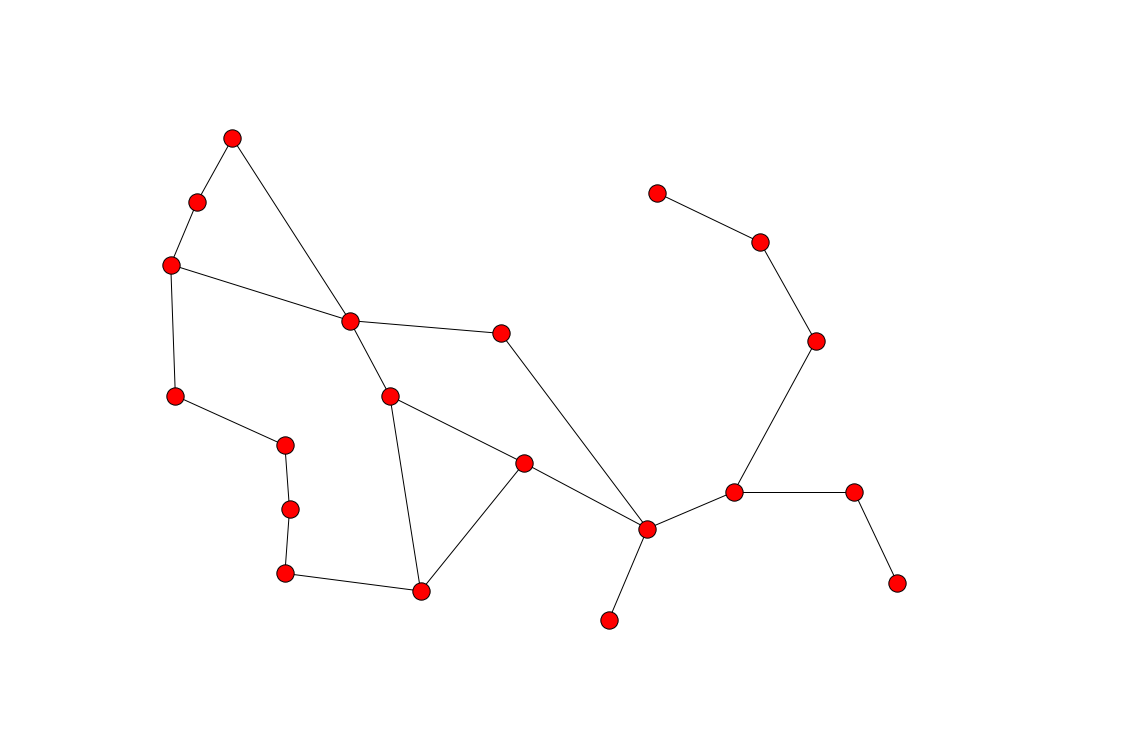

In [141]:
G = nx.Graph()

for n, p in romania_locations.items():
#     print(n)
    # add nodes from romania_locations
    G.add_node(n)
    
#     print(p)
    # add positions for each node
    G.node[n]['pos'] = p
    
# add edges between cities in romania map - UndirectedGraph defined in search.py
for node in romania_map.nodes():
#     print(node)
    connections = romania_map.get(node)
#     print((connections))
    for connection in connections.keys():
        G.add_edge(node, connection)
        

# draw the graph with locations from romania_locations
plt.figure(figsize=(15,10))
nx.draw(G, romania_locations)
plt.show()